In [11]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

print('Libraries Imported!')

Libraries Imported!


In [12]:
df = pd.read_csv('car_prices.csv')


In [13]:
df1 = df.copy()

df1.dtypes
df1.shape

(558837, 16)

In [209]:
print(df1.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [44]:
df1.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [46]:
df1['year'].nunique()
df1['year'].isnull().sum()

0

In [48]:
df1['make'].nunique()
df1['make'].isnull().sum()

10301

In [50]:
df1['trim'].nunique()
df1['trim'].isnull().sum()

10651

In [52]:
df1['body'].nunique()
# df1['body'].describe()
df1['body'].isnull().sum()

13195

In [54]:
df1['transmission'].unique()
#df1['transmission'].describe()
df1['transmission'].isnull().sum()

0

In [56]:
df1['model'].unique()
df1['model'].isnull().sum()

10399

In [58]:
df1['vin'].nunique()
df1['vin'].isnull().sum()

0

In [59]:
df1['state'].nunique()
df1['state'].isnull().sum()

0

In [62]:
df1['condition'].nunique()
df1['condition'].isnull().sum()
# print(df1['condition'].max())
# print(df['condition'].min())

11794

In [64]:
df1['odometer'].nunique()
df1['odometer'].isnull().sum()

94

In [66]:
df1['color'].nunique()
df1['color'].isnull().sum()

749

In [68]:
df1['interior'].nunique()
df1['interior'].isnull().sum()

749

In [70]:
df1['seller'].nunique()
df1['seller'].isnull().sum()

0

In [72]:
df1['mmr'].nunique()
df1['mmr'].isnull().sum()

12

In [74]:
df1['sellingprice'].nunique()
df1['sellingprice'].isnull().sum()

12

In [76]:
df1['saledate'].nunique()
df1['saledate'].isnull().sum()

12

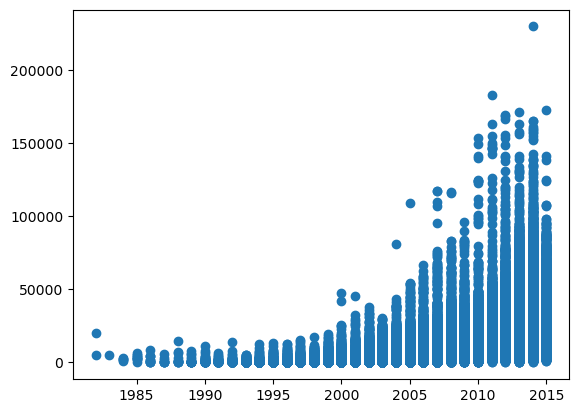

In [78]:
plt.scatter(x = df['year'], y = df['sellingprice'])

<Axes: xlabel='transmission', ylabel='sellingprice'>

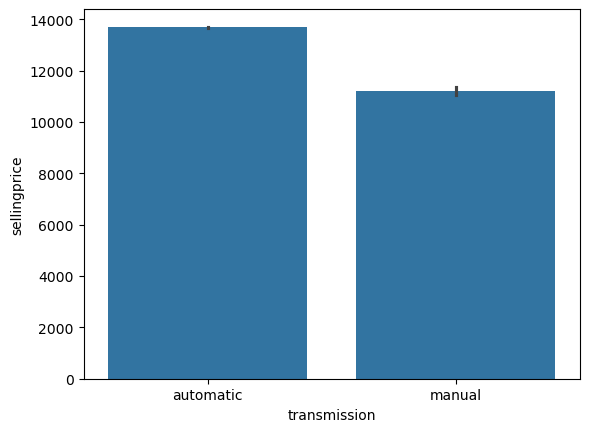

In [79]:
sns.barplot(x = df1['transmission'], y = df1['sellingprice'])

In [82]:
df1['transmission'].value_counts()

transmission
automatic    541267
manual        17544
Name: count, dtype: int64

## Because this is a categorical value and the difference between Manual and Auto is huge, I'll use Mod and replace the values of the null values with Automatic 

In [85]:
df1['transmission'].fillna('automatic', inplace= True)

df1['transmission'].isnull().sum()

/var/folders/ch/kb1qmx591n5c2yvx2fc6ffyw0000gn/T/ipykernel_65432/4186971295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['transmission'].fillna('automatic', inplace= True)


0

In [87]:
unwanted = df1[(df1['transmission'] == 'Sedan') | (df1['transmission'] == 'sedan')].index
df1.drop(unwanted, inplace= True)

df1['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

## Now we have the values that are relavent so we can visualize this data easily.

<Axes: xlabel='transmission', ylabel='sellingprice'>

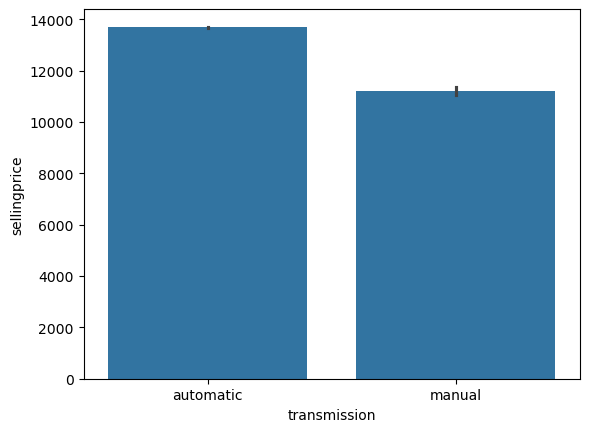

In [193]:
sns.barplot( x = df1['transmission'], y = df1['sellingprice'])

## The condition value has to be fixed next 

In [92]:
df1['condition'].replace(range(10, 21), 1, inplace=True)
df1['condition'].replace(range(20, 31), 2, inplace=True)
df1['condition'].replace(range(30, 41), 3, inplace=True)
df1['condition'].replace(range(40, 51), 4, inplace=True)

df1['condition'].value_counts()

/var/folders/ch/kb1qmx591n5c2yvx2fc6ffyw0000gn/T/ipykernel_65432/3684880069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['condition'].replace(range(10, 21), 1, inplace=True)
/var/folders/ch/kb1qmx591n5c2yvx2fc6ffyw0000gn/T/ipykernel_65432/3684880069.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

condition
4.0    179895
3.0    172479
2.0    132490
1.0     50931
5.0     11222
Name: count, dtype: int64

<Axes: xlabel='condition', ylabel='sellingprice'>

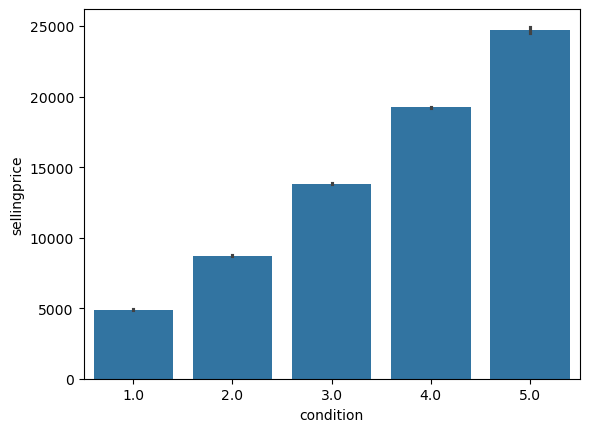

In [185]:
# sns.regplot(x = df1['condition'], y = df1['sellingprice'])
sns.barplot(x = df1['condition'], y = df1['sellingprice'])

In [102]:
df['color'].value_counts()

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
9562              1
2846              1
18561             1
18384             1
5705              1
2817              1
6158              1
721               1
20627             1
20379             1
9837              1
9887              1
2172              1
339               1
6864              1
2711              1
11034             1
16633             1
6388              1
15719             1
12655             1
14872             1
1167              1
9410              1
4802              1
5001              1
Name: count, dtype: int64

In [109]:
unwnated_color = df1[(df1['color'] == '9562') | (df1['color'] == '2846') | (df1['color'] == '18561') | (df1['color'] == '18384') | (df1['color'] == '5705') | 
(df1['color'] == '2817') | (df1['color'] == '6158') | (df1['color'] == '721') | (df1['color'] == '20627') | (df1['color'] == '20379') | 
(df1['color'] == '9837') | (df1['color'] == '9887') | (df1['color'] == '2172') |( df1['color'] == '339') | (df1['color'] == '6864') |
(df1['color'] == '2711') | (df1['color'] == '11034') | (df1['color'] == '16633') | (df1['color'] == '6388') | (df1['color'] == '15719') |
(df1['color'] == '12655') | (df1['color'] == '14872') | (df1['color'] == '1167') | (df1['color'] == '9410')|
(df1['color'] == '4802') | (df1['color'] == '5001') | (df1['color'] == 'nan')].index

unwnated_color

df1.drop(unwnated_color, inplace= True)

df1.color.value_counts()

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
other         24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

## Got rid of the unwanted rows but there's still one '-' that needs to be replaced 

In [107]:
df1['color'] = df1['color'].replace('—' , 'other')



In [112]:
df1['color'].value_counts()

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
other         24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='color'>

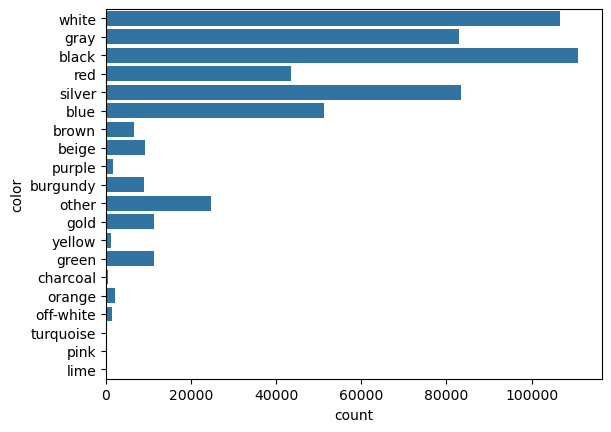

In [187]:
sns.countplot(df1['color'])

In [ ]:
sns.barplot( x = df1['color'], y = df1['sellingprice'])

Don't need the 'vin' column

In [116]:
df1 = df1.drop('vin', axis = 1)

In [132]:
df1['state'].describe()
df1['state'].nunique()

38

### This shows that there are 38 different stated included in this dataset. Checking if there's any unwanted value in this

In [130]:
df1['state'].value_counts()

state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12027
md    11158
wi     9851
mn     9429
az     8741
co     7775
wa     7416
ma     6729
ny     5699
in     4325
sc     4251
ne     4013
on     3442
pr     2725
la     2191
ms     1851
ut     1836
qc     1245
hi     1237
or     1155
ab      928
nm      171
ok       72
ns       61
al       26
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='state'>

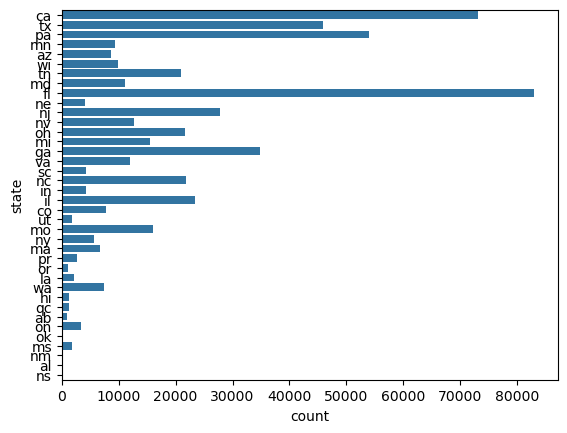

In [195]:
sns.countplot(df1['state'])

Have to convert 'state' to categorical for further visualization

In [221]:
df1['state'] == df1['state'].astype('category')

print(df1['state'].dtype)

object


In [217]:
df1['state'].value_counts()

state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12027
md    11158
wi     9851
mn     9429
az     8741
co     7775
wa     7416
ma     6729
ny     5699
in     4325
sc     4251
ne     4013
on     3442
pr     2725
la     2191
ms     1851
ut     1836
qc     1245
hi     1237
or     1155
ab      928
nm      171
ok       72
ns       61
al       26
Name: count, dtype: int64

In [223]:
sns.barplot(df1['sellingprice'], hue = df1['state'])

ValueError: The following variable cannot be assigned with wide-form data: `hue`